IMPORTING ALL NECESSARY PACKAGES. MOST OF THEM ARE ALREADY IN THE ANACONDA DISTRIBUTION

In [2]:
import asyncio
import nest_asyncio
import aiohttp
from understat import Understat
import requests
import codecs
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.animation as animation

In [ ]:
club="Bayern Munich"

In [ ]:
with open('club_name.txt', 'w') as f:
    f.write(club)
    f.close

In [ ]:
team_for_foto=""
if club == "RasenBallsport Leipzig":
    team_for_foto="RB Leipzig"
elif club == "FC Cologne":
    team_for_foto="FC Köln"
elif club== "Augsburg":
    team_for_foto="FC Augsburg"
elif club== "Borussia M.Gladbach":
    team_for_foto="Borussia Mönchengladbach"
else:
    team_for_foto=club
team_for_foto

'Bayern Munich'

In [8]:
torneo="2025-2026"

In [ ]:
foto=f'images/{team_for_foto}.png'

In [ ]:
%run -i undesstatteams.py

In [10]:
# Get csv from D://understatteams.py !!!!!
df_understat=pd.read_csv(f'{club}_seasons_shots.csv')

In [12]:
df_understat.head()

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
0,3,0.941,0.247,Michael Olise,RightFoot,BlockedShot,Bayern Munich,RasenBallsport Leipzig,Serge Gnabry,0.059095
1,10,0.899,0.294,Konrad Laimer,RightFoot,SavedShot,Bayern Munich,RasenBallsport Leipzig,Harry Kane,0.286613
2,15,0.785,0.558,Serge Gnabry,LeftFoot,BlockedShot,Bayern Munich,RasenBallsport Leipzig,Harry Kane,0.035854
3,24,0.864,0.432,Harry Kane,RightFoot,MissedShots,Bayern Munich,RasenBallsport Leipzig,Joshua Kimmich,0.121176
4,26,0.879,0.354,Michael Olise,RightFoot,Goal,Bayern Munich,RasenBallsport Leipzig,NaN,0.069164


In [14]:
own_goals_total=len(df_understat[df_understat['result']=='OwnGoal'])
own_goals_total

0

In [16]:
own_goals=df_understat[df_understat['result']=='OwnGoal']
own_goals['xG']=0.5
own_goals

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG


In [18]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_league_players(
            "bundesliga",
            2025,
            team_title=club
        )
        squad=json.dumps(players, indent=4, ensure_ascii=False)
    with codecs.open(f'{club}_squad.json', "w", "utf-8") as jsonfile:
        jsonfile.write(squad)
        #json.dumps(jamal_json, indent=4)
        jsonfile.close() 

nest_asyncio.apply()
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

squad_df=pd.read_json(f'{club}_squad.json')

In [20]:
squad=squad_df['player_name'].unique()
squad

array(['Harry Kane', 'Luis Díaz', 'Serge Gnabry', 'Michael Olise',
       'Jonathan Tah', 'Konrad Laimer', 'Aleksandar Pavlovic',
       'Manuel Neuer', 'Joshua Kimmich', 'Leon Goretzka',
       'Raphael Guerreiro', 'Dayotchanculle Upamecano', 'Sacha Boey',
       'Josip Stanisic', 'Nicolas Jackson', 'Tom Bischof', 'Kim Min-Jae',
       'Jonah Kusi-Asare', 'Wisdom Mike', 'Lennart Karl'], dtype=object)

In [22]:
"Paul Nebel" in squad

False

In [24]:
own_goals_len=len(own_goals[~own_goals['player'].isin(squad)])
own_goals_len

0

In [26]:
ogf=own_goals[~own_goals['player'].isin(squad)]
ogf

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG


In [28]:
own_goals_for=0
for player in own_goals['player']:
    if player not in squad:
        own_goals_for+=1
own_goals_for

0

In [30]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

#df_understat['result'].unique()

In [32]:
df_understat[df_understat['result']=='OwnGoal']

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG


In [34]:
#pip install mplsoccer
#pip install highlight-text

In [36]:
from highlight_text import ax_text,fig_text
from mplsoccer import (VerticalPitch, Pitch)

WE WILL CHANGE SOME OF THE BASIC PARAMETERS USING THE rcParams method OF MPL

In [39]:
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Franklin Gothic Medium Cond'
mpl.rcParams['legend.fontsize'] = 12


In [41]:
#mpl.font_manager.FontManager.get_font_names(mpl)

In [43]:
import numpy as np
from PIL import Image
from urllib.request import urlopen
import os
from mplsoccer import add_image

Creating animation with 102 frames


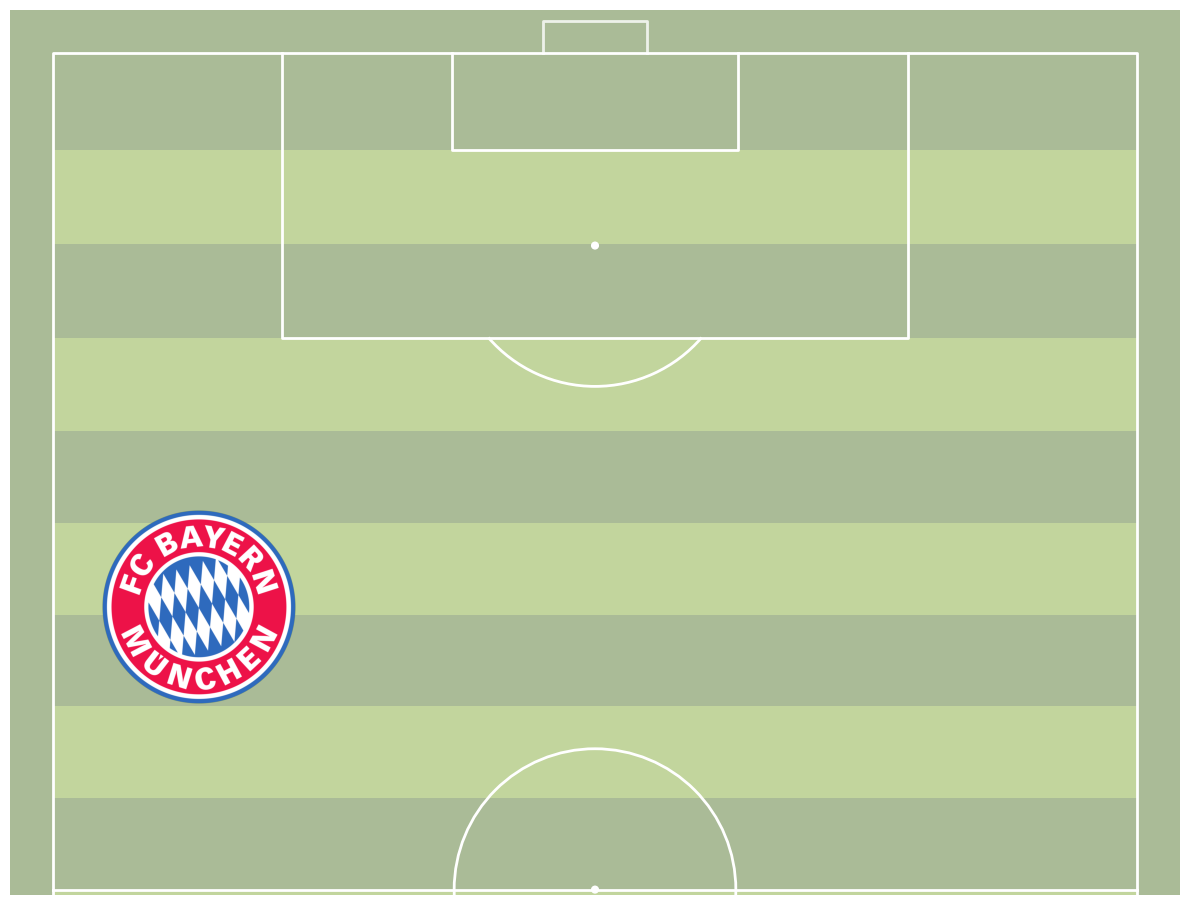

Available animation writers: ['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#import numpy as np
#from mplsoccer import VerticalPitch

df_fil = df_understat  # Assuming df_understat is defined elsewhere

# Set up the pitch and create figure/axes BEFORE the animation
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line 
    half=True,  # half of a pitch
    goal_type='box',
    goal_alpha=0.8, 
    pitch_type='opta',
    pitch_color='#aabb97',
    stripe=True,
    stripe_color='#c2d59d',
    line_color='white')  # control the goal transparency

# Create the figure and axes once, outside the update function
fig, ax = pitch.draw(figsize=(12, 10))

# Define the update function for animation
def update(frame):
    # Clear the current axes
    ax.clear()
    
    # Redraw the pitch on the existing axes
    pitch.draw(ax=ax)
    
    # Filter data for the current minute
    current_data = df_fil[df_fil['minute'] <= frame]
    
    # Plot different shot types
    shot_types = ['ShotOnPost', 'BlockedShot', 'MissedShots', 'SavedShot', 'Goal', 'OwnGoal']
    colors = {'ShotOnPost': 'white', 'BlockedShot': 'purple', 
              'MissedShots': 'yellow', 'SavedShot': 'blue', 'Goal': 'red', 'OwnGoal': 'red'}
    markers = {'ShotOnPost': 'o', 'BlockedShot': 'o', 
               'MissedShots': 'd', 'SavedShot': 'h', 'Goal': 'football', 'OwnGoal': 'x'}
    
    labels = {'ShotOnPost': 'SHOTS ON POST', 'BlockedShot': 'BLOCKED SHOT', 
               'MissedShots': 'MISSED SHOT', 'SavedShot': 'SAVED SHOT', 'Goal': 'GOAL', 'OwnGoal': 'OWN GOAL'}
    
    for shot_type in shot_types:
        try:
            shots = current_data[current_data['result'] == shot_type]
            if not shots.empty:
                pitch.scatter(
                    shots['X'].astype(float),
                    shots['Y'].astype(float),
                    s=np.sqrt(shots['xG'].astype(float)) * 150,
                    marker=markers.get(shot_type, 'o'), 
                    label= labels.get(shot_type),
                    alpha=0.9,
                    edgecolors='black', 
                    facecolor=colors.get(shot_type, 'gray'), 
                    ax=ax 
                    #label=shot_type.upper()
                )
        except Exception as e:
            print(f"Error plotting {shot_type}: {e}")
    
    # Add title showing current minute
    #team_for_foto = "Team"  # Replace with actual team name variable if available
    ax.set_title(f'{team_for_foto.upper()} Shots - Minute {frame} of all played matches', fontsize=16)
    ax.text(75, 61, f'{team_for_foto}\nALL SHOTS\nSEASON {torneo}', weight='bold', size=20)
    ax.text(25,64,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])+ int(own_goals_for)), weight='bold', size=15)
    ax.text(25,62.5,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
    ax.text(25,61,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
    ax.text(97,57,'Copyright: Enrique Adolfo López Magallón\nData: Understat.com.')# Comparison with <forwards>'+
 #       ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
  #      size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')
    
    # Add legend if there are items to show
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(loc='lower center', ncol=3)
    
    # Ensure proper layout
    fig.tight_layout()
    
    # Force drawing update
    fig.canvas.draw()
    
    return fig, ax

# Create animation with all frames
max_minute = df_fil['minute'].max()
all_frames = range(1, int(max_minute)+1)  # Use all frames
print(f"Creating animation with {len(all_frames)} frames")

ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=all_frames,
    interval=10000,
    blit=False,
    repeat=False
)

# Use a direct file path instead of urlopen for local files
image_path = foto

# Check if the file exists before trying to open it
if os.path.exists(image_path):
    image = Image.open(image_path)
    ax_image = add_image(image, fig, left=0.07, bottom=0.245, width=0.2, height=0.2)
else:
    print(f"Warning: Image file not found at {image_path}")
    # Optionally continue without the image


# Show the animation
plt.show()

# Save the animation
available_writers = animation.writers.list()
print(f"Available animation writers: {available_writers}")

if 'ffmpeg' in available_writers:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=2, metadata=dict(artist='Enrique Adolfo Lopez Magallon - Relatooor'), bitrate=1800)
    ani.save(f'{club}_shots_animation.mp4', writer=writer, dpi=150)
elif 'pillow' in available_writers:
    writer = animation.PillowWriter(fps=5)
    ani.save(f'{club}_shots_animation.gif', writer=writer, dpi=150)
else:
    print("No suitable writer found.")

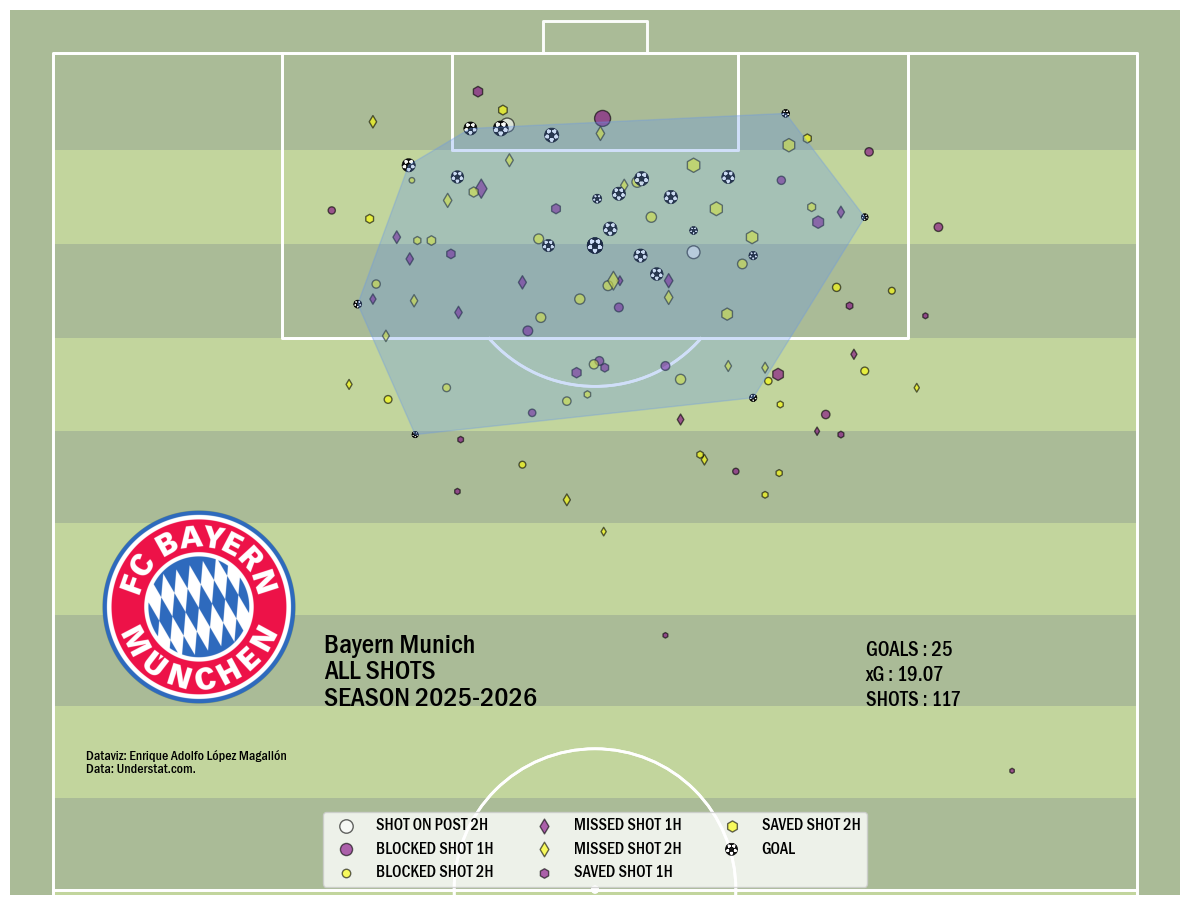

In [ ]:
# SETTING UP THE AXES
#fig, ax = plt.subplots(figsize=(10,12))
#ax.axis('off')
#fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST TEAM
pitch = pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line 
    half=True,  # half of a pitch
    goal_type='box',
    goal_alpha=0.8, 
    pitch_type='opta',
    pitch_color='#aabb97',
    stripe=True,
    stripe_color='#c2d59d',
    line_color='white')  

fig, ax = pitch.draw(figsize=(12, 10))

#PLOTTING HTEAM
#df_fil = df_understat.loc[df_understat['HomeAway']=='h']
df_fil = df_understat
#df_hOG = df_fil[df_fil['HomeAway']=='a']
#df_fil = df_a
#df_hOG = df_fil[df_fil['HomeAway']=='h']
df_h1H = df_fil[df_fil['minute']<=45]
df_h2H = df_fil[df_fil['minute']>45]

#PLOTTING SHOTS TEAM 1 PER TYPE AND HALF.LABELS APPEAR ONLY IF VARIABLE IS FILLED


if "ShotOnPost" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='ShotOnPost']['X'],df_h1H[df_h1H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 1H")

if "ShotOnPost" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='ShotOnPost']['X'],df_h2H[df_h2H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 2H")
    
if "BlockedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='BlockedShot']['X'],df_h1H[df_h1H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="BLOCKED SHOT 1H")

if "BlockedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='BlockedShot']['X'],df_h2H[df_h2H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="BLOCKED SHOT 2H")

if "MissedShots" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='MissedShots']['X'],df_h1H[df_h1H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="MISSED SHOT 1H")

if "MissedShots" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='MissedShots']['X'],df_h2H[df_h2H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="MISSED SHOT 2H")
    
if "SavedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='SavedShot']['X'],df_h1H[df_h1H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="SAVED SHOT 1H")

if "SavedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='SavedShot']['X'],df_h2H[df_h2H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="SAVED SHOT 2H")
    


#NOW PLOTTING THE GOALS
if "Goal" in iter(df_fil['result']):
    pitch.scatter(df_fil[df_fil['result']=='Goal']['X'],df_fil[df_fil['result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['result']=='Goal']['xG'])*150, marker='football', alpha=0.9,
              edgecolors='black', facecolor='red', ax=ax, label="GOAL")
    hull=pitch.convexhull(df_fil[df_fil['result']=='Goal']['X'], df_fil[df_fil['result']=='Goal']['Y'])
    pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)

if "OwnGoal" in iter(ogf['result']):
    pitch.scatter(100-ogf[ogf['result']=='OwnGoal']['X']*100,100-ogf[df_fil['result']=='OwnGoal']['Y']*100, 
              s=np.sqrt(ogf[ogf['result']=='OwnGoal']['xG'])*150, marker='x', alpha=0.9,
              edgecolors='red', facecolor='red', ax=ax, label="OWN GOAL FOR")
    #hull=pitch.convexhull(df_fil[df_fil['result']=='OwnGoal']['X'], df_fil[df_fil['result']=='OwnGoal']['Y'])
    #pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)
#OWNGOALS
#if len(df_hOG) >0:
 #   pitch.scatter(df_hOG[df_hOG['result']=='Goal']['X'],df_hOG[df_hOG['result']=='Goal']['Y'], 
  #            s=np.sqrt(df_hOG[df_hOG['result']=='Goal']['xG'])*150, marker='x', alpha=0.9,
   #           edgecolors='black', facecolor='orange', ax=ax_opta1, label='AUTOGOL DEL RIVAL')


# ADDING THE LEGEND
ax.legend(loc='lower center', ncol=3)#.get_texts()[0].set_color("black")

ax.text(25,64,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])+ int(own_goals_for)), weight='bold', size=15)
ax.text(25,62.5,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax.text(25,61,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax.text(75, 61, f'{team_for_foto}\nALL SHOTS\nSEASON {torneo}', weight='bold', size=20)

# Use a direct file path instead of urlopen for local files
image_path = foto

# Check if the file exists before trying to open it
if os.path.exists(image_path):
    image = Image.open(image_path)
    ax_image = add_image(image, fig, left=0.07, bottom=0.245, width=0.2, height=0.2)
else:
    print(f"Warning: Image file not found at {image_path}")
    # Optionally continue without the image


pitch.draw(ax=ax)

# ADDING A FOOTER
ax.text(97,57,'Dataviz: Enrique Adolfo López Magallón\nData: Understat.com.')# Comparison with <forwards>'+
 #       ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
  #      size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')


#EXPORT TO IMG

plt.savefig(f'{club}_shots.png',dpi=300,facecolor=background)

In [26]:
shots_grouped=df_fil.groupby('minute').size()

In [27]:
shots_grouped


minute
0      1
1      1
2      3
3      1
4      1
      ..
94     2
97     2
98     2
101    1
102    1
Length: 69, dtype: int64

In [28]:
shots_grouped.sum()

117

In [49]:
from matplotlib.animation import FFMpegWriter

Creating animation with 1160 frames


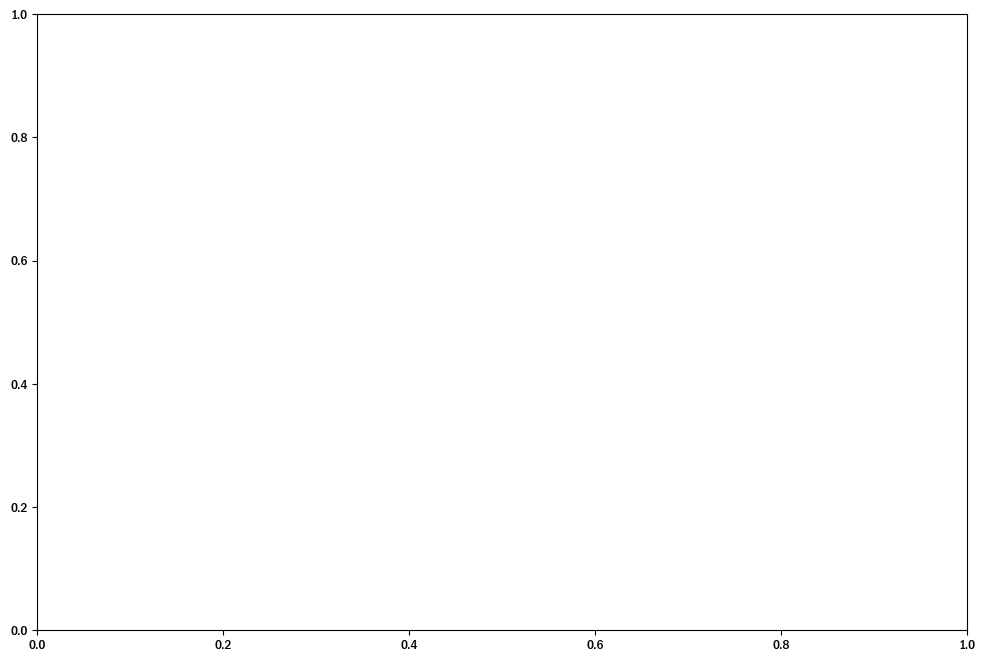

Available animation writers: ['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


In [61]:
def update(frame):
    ax.clear()
    df_fil = df_understat
    # Calculate which minute we're showing and how far along the growth we are
    current_minute = int(frame) + 1
    growth_fraction = frame - int(frame)  # Decimal part represents growth progress
    
    
    # Count shots per minute for all data
    shot_counts = df_fil.groupby('minute').size()
    minutes = list(range(0, int(max_minute) + 1))
    
    # Create arrays for the current state of the animation
    current_counts = []
    for minute in minutes:
        if minute < current_minute:
            # Previous minutes are fully grown
            count = shot_counts.get(minute, 0)
        elif minute == current_minute:
            # Current minute is growing
            count = shot_counts.get(minute, 0) * growth_fraction
        else:
            # Future minutes are not shown yet
            count = 0
        current_counts.append(count)



    #if minute == last_frame:
     #   current_display_minute = max_minute  # Show the final minute when at last frame
    #else:

    
    # Calculate total shots, ensuring all shots are counted at the last frame
        if minute == int(max_minute) + 1:
            total_shots = sum(shot_counts.get(min, 0) for min in range(0, max_minute + 1))
        else:
            total_shots = sum(shot_counts.get(min, 0) for min in range(0, current_minute))
            if growth_fraction > 0:
                total_shots += shot_counts.get(current_minute, 0) * growth_fraction
    
    # Create stem plot with magenta lines and orange dots
    markerline, stemlines, baseline = ax.stem(minutes, current_counts, linefmt='m-', markerfmt='o', basefmt='k-')
    plt.setp(markerline, markersize=8, color='orange')  # Orange dots
    plt.setp(stemlines, linewidth=2, color='magenta')   # Magenta lines
    
    # Set axis limits and labels
    ax.set_xlim(0, max_minute + 1)
    ax.set_ylim(0, shot_counts.max() + 1)
    ax.set_xlabel('Minutes', weight='bold', size=12)
    ax.set_ylabel('Number of Shots', weight='bold', size=12)
    # Add title and information
    current_display_minute = current_minute if growth_fraction == 0 else f"{current_minute-1}→{current_minute}"
    #   return current_display_minute
    ax.set_title(f'{club} Shot Count per Minute (Minute: {current_display_minute})', weight='bold', size=15)
    
 #   total_shots = sum(shot_counts.get(min, 0) for min in range(0, current_minute))
  #  if growth_fraction > 0:
   #     total_shots += shot_counts.get(current_minute, 0) * growth_fraction
    ax.text(max_minute * 0.7, ax.get_ylim()[1] * 0.9, f'Total Shots: {int(total_shots)}', weight='bold', size=15)
    ax.text(max_minute * 0.7, ax.get_ylim()[1] * 0.1, 'Copyright: Enrique Adolfo López Magallón\nData: Understat.com.')
    
    # Ensure proper layout
    fig.tight_layout()
    
    # Force drawing update
    fig.canvas.draw()
    
    return fig, ax

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create animation with frames for growing each minute
max_minute = df_fil['minute'].max()
# Create 10 frames for each minute's growth
frames_per_minute = 10
all_frames = np.linspace(0, max_minute, int(max_minute) * frames_per_minute)

fps = 20  # Based on your writer fps setting
freeze_frames = int(7 * fps)  # 7 seconds worth of frames
last_frame = int(max_minute)  # The last frame value
freeze_extension = [last_frame] * freeze_frames
all_frames = np.append(all_frames, freeze_extension)

            
print(f"Creating animation with {len(all_frames)} frames")

ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=all_frames,
    interval=50,  # Faster animation (50ms per frame)
    blit=False,
    repeat=False
)

# Show the animation
plt.show()

# Save the animation
available_writers = animation.writers.list()
print(f"Available animation writers: {available_writers}")

if 'ffmpeg' in available_writers:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=20, metadata=dict(artist='Enrique Adolfo Lopez Magallon - Relatooor'), bitrate=1800)
    ani.save(f'{club}_shot_counts_stem_animation.mp4', writer=writer, dpi=150)
elif 'pillow' in available_writers:
    writer = animation.PillowWriter(fps=20)
    ani.save(f'{club}_shot_counts_stem_animation.gif', writer=writer, dpi=150)
else:
    print("No suitable writer found.")